### Notebook to visualize individual boxplot comparison of E3 mutated ligase versus their wild type counterparts

In [3]:
import pandas as pd
import numpy as np
import os
import re
import glob
import json
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerPathCollection
from scipy import stats
import seaborn as sns

### Paths data

In [11]:
base="../../" 
# output drivers TCGA
path_drivers_ccle= os.path.join(base,"data","signals_E3_ligases_ccle.tsv")
# output
path_output_analysis= os.path.join(base,"data","output_e3_ligases_change_stability")
path_colors = os.path.join(base,"degrons",'positive_selection','analysis',"dict_colors.json")
# interacting pairs
output_pickle_annotated = os.path.join(base,'data', 'dict_annotated_pairs.json' )
output_pickle_all = os.path.join(base,'data', 'dict_all_pairs.json' )
# Plots 
path_output_plots = os.path.join(base,"plots","Figure6","individual_pairs")
# Data of RPPA
path_file_rppa =os.path.join(base,"data","rppa_matched_irls_ccle.tsv.gz")
samples_e3_mutated = os.path.join(base,"data","e3_mutated_grouped_ccle.tsv")


### aux functions

In [5]:
def concat(grp):
    l = []
    for group_samples in grp:
        for sample in group_samples.split(","):
            l.append(sample)
    return ",".join(l)

### Read colors

In [7]:
dict_colors = json.load(open(path_colors,'r'))

### Read significant pairs

In [12]:
path_output_analysis

'/workspace/projects/ubiquitins/codereview/degradation/data/output_e3_ligases_change_stability'

In [14]:
l = []
for filef in glob.glob(path_output_analysis+"/*"+"_CCLE.tsv.gz"):
    df = pd.read_csv(filef,sep="\t")
    df = df[(df["Q_value"]<0.1)&(df["Type_Change"]=="increase")]
    l.append(df)
df_total = pd.concat(l)

### Read RPPA and samples mutated

In [15]:
df_diff_info = pd.read_csv(path_file_rppa,sep="\t",compression="gzip")
df_wt = df_diff_info[
            ((df_diff_info["Phenotype"] == "WT")) & (df_diff_info["CNA"] >= -1) & (df_diff_info["CNA"] <= 1) & (
                np.isfinite(df_diff_info["Stability_Change"]))]

df_samples_e3_mutated = pd.read_csv(samples_e3_mutated,sep="\t")

### Prepare the dataframe

In [16]:
protein_pairs = df_total[["Protein_Driver_Mutated","Protein","Cancer_Type","Hugo_Symbol"]].drop_duplicates()
protein_pairs

Protein_Driver_Mutated                  Protein Cancer_Type Hugo_Symbol
1                    BRCA1                 ER-alpha         PAN        ESR1
10                     CBL              EGFR_pY1173         PAN        EGFR
12                     CBL                     EGFR         PAN        EGFR
13                     CBL                      Syk         PAN         SYK
15                     CBL                      Lck         PAN         LCK
16                     CBL                    c-Kit         PAN         KIT
17                    CBLB              EGFR_pY1173         PAN        EGFR
18                    CBLB      EGFR_pY1068_Caution         PAN        EGFR
19                    CBLB                     EGFR         PAN        EGFR
27                   FBXO4                Cyclin_D1         PAN       CCND1
30                   FBXW7               c-Jun_pS73         PAN         JUN
31                   FBXW7                   Notch1         PAN      NOTCH1
36                   FBXW7        Cyclin_E2_Caution         PAN       CCNE2
37                   FBXW7                Cyclin_E1         PAN       CCNE1
40                   FBXW7            c-Myc_Caution         PAN         MYC
43                   FBXW7                     mTOR         PAN        MTOR
45                    FZR1                Cyclin_B1         PAN       CCNB1
50                   HACE1                Cyclin_D1         PAN       CCND1
53                    ITCH               c-Jun_pS73         PAN         JUN
56                    ITCH                     EGFR         PAN        EGFR
62                  MAP3K1          MAPK_pT202_Y204         PAN       MAPK3
67                   NEDD4                     EGFR         PAN        EGFR
68                   NEDD4                      Syk         PAN         SYK
71                   RBBP6                     YB-1         PAN        YBX1
75                   RNF31  PKC-alpha_pS657_Caution         PAN       PRKCA
76                   RNF31                PKC-alpha         PAN       PRKCA
80                  SMURF1  PKC-alpha_pS657_Caution         PAN       PRKCA
81                  SMURF1                PKC-alpha         PAN       PRKCA
82                  SMURF1                      Lck         PAN         LCK
92                    TTC3                Akt_pS473         PAN        AKT2
94                    TTC3                Akt_pT308         PAN        AKT2
95                    TTC3                Akt_pS473         PAN        AKT1
98                    TTC3                Akt_pS473         PAN        AKT3
100                   TTC3                Akt_pT308         PAN        AKT3
103                  UBE3A            Rb_pS807_S811         PAN         RB1
104                  UBE3A               Rb_Caution         PAN         RB1
106                  UBE3A                Annexin 1         PAN       ANXA1
110                   XIAP  C-Raf(BD610151)_Caution         PAN        RAF1

In [17]:
path_output_plots

'/workspace/projects/ubiquitins/codereview/degradation/plots/Figure6/individual_pairs'

/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/fran/Downloads/yes/envs/regression/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may

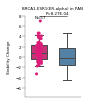

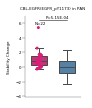

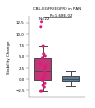

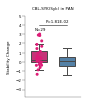

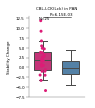

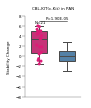

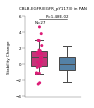

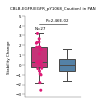

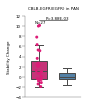

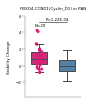

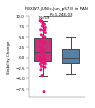

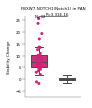

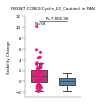

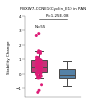

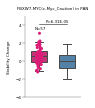

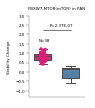

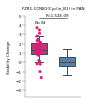

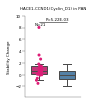

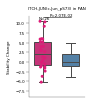

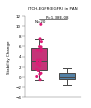

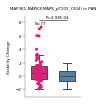

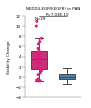

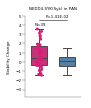

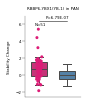

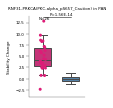

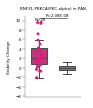

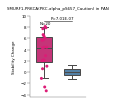

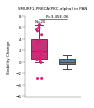

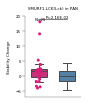

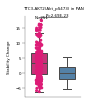

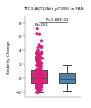

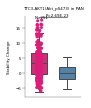

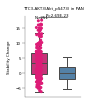

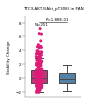

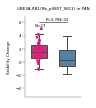

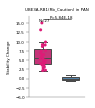

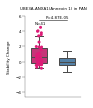

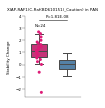

In [18]:
l = []
for e3,target,cancer,hugo in protein_pairs.values:
    
    if cancer != "PAN":
        # Select samples with mutations in the E3 ligase
        
        samples_e3=df_samples_e3_mutated[(df_samples_e3_mutated["Hugo_Symbol"]==e3)&(df_samples_e3_mutated["Cancer_Type"]==cancer)]["Matchable_Sample_ID"].values[0].split(",")
        # Get RPPA values of MT
        mutated_samples=df_wt[(df_wt["Protein"]==target)&(df_wt["Cancer_Type"]==cancer)&(df_wt["Matchable_Sample_ID"].isin(samples_e3))]
        # And WT
        wt_samples=df_wt[(df_wt["Protein"]==target)&(df_wt["Cancer_Type"]==cancer)&(~df_wt["Matchable_Sample_ID"].isin(samples_e3))]
    else:
        grouped_samples = df_samples_e3_mutated.groupby(["Hugo_Symbol"],as_index=False).agg({"COUNT_MUTS":np.nansum,"Matchable_Sample_ID":concat})
        # Select samples with mutations in the E3 ligase
        samples_e3=grouped_samples[(grouped_samples["Hugo_Symbol"]==e3)]["Matchable_Sample_ID"].values[0].split(",")
        # Get RPPA values of MT
        mutated_samples=df_wt[(df_wt["Protein"]==target)&(df_wt["Matchable_Sample_ID"].isin(samples_e3))]
        # And WT
        wt_samples=df_wt[(df_wt["Protein"]==target)&(~df_wt["Matchable_Sample_ID"].isin(samples_e3))]
 
    mt = mutated_samples["Stability_Change"].values
    wt = wt_samples["Stability_Change"].values
    pvalue = stats.mannwhitneyu(mt,wt,alternative="two-sided")
    mutated_samples["Type"] ="MT"
    wt_samples["Type"] = "WT"
    total = pd.concat([mutated_samples,wt_samples])
    fig,ax = plt.subplots(nrows=1,ncols=1)
    fig.set_size_inches(1, 1.5)
    pallete = {"MT":"#cc0000","WT":"#4682B4"}
    pallete["MT"] = dict_colors[cancer]
    s = ["MT","WT"]
    sns.boxplot(data=total,x="Type",y="Stability_Change",palette=pallete,whis=0.9,notch=False,fliersize=0,width=0.6,order=s,ax=ax,linewidth=1)
    sns.stripplot(data=total[total["Type"]=="MT"],x="Type",y="Stability_Change",size=3,palette=pallete,jitter=True,dodge=True,order=s)

    ax.set_xticklabels([],rotation=90,fontsize=6)
    ax.set_ylabel("Stability Change",fontsize=4)
    ax.set_xlabel("",fontsize=6)
    ax.set_title(e3+"-"+hugo+"("+target+")"+" in "+ cancer,fontsize=4)
    maxv = np.nanmax(mutated_samples["Stability_Change"].values)
    
    ax.axhline(y=maxv+1.0,xmin=0.25,xmax=0.75,color="black",lw=0.5)
    ax.text(y=maxv+1.2,x=0.25,s="P="+str("{0:.2E}".format(pvalue[1])),fontsize=4)
    ax.text(y=maxv+0.4,x=-0.15,s="N="+str(len(mt)),fontsize=4)
    ax.set_ylim((ax.get_ylim()[0],int(maxv)+2))
    #ax.set_yticks(range(int(ax.get_ylim()[0])-1,int(maxv)+2,1))
    
    ax.tick_params(axis = 'y', labelsize =4  , pad=0.5 ,width=0.25)
    ax.tick_params(axis = 'x', labelsize =4  , pad=0.5 ,width=0.0)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_linewidth(0.25)
    ax.spines['bottom'].set_linewidth(0.25)
    plt.savefig(path_output_plots+"/"+e3+"_"+target+"_"+cancer+'_CCLE.pdf', dpi=800,bbox_inches="tight")
    

    


# Create the dataset for striplot